# Fisheries competition 大自然保护渔业监测

In this notebook we're going to investigate a range of different architectures for the [Kaggle fisheries competition](https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring/).  The video states that vgg.py and ``vgg_ft()`` from utils.py have been updated to include VGG with batch normalization, but this is not the case.  We've instead created a new file [vgg_bn.py](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/vgg16bn.py) and an additional method ``vgg_ft_bn()`` (which is already in utils.py) which we use in this notebook.

In [4]:
%matplotlib inline
import imp
import utils
imp.reload(utils)
from utils import *
from __future__ import division, print_function

In [5]:
#path = "data/fish/sample/"
path = "data/fish/"
batch_size=64

In [6]:
batches = get_batches(path+'train', batch_size=batch_size)
val_batches = get_batches(path+'valid', batch_size=batch_size*2, shuffle=False)

Found 3277 images belonging to 8 classes.
Found 500 images belonging to 8 classes.


In [3]:
(val_classes, trn_classes, val_labels, trn_labels, 
    val_filenames, filenames, test_filenames) = get_classes(path)

Found 3277 images belonging to 8 classes.
Found 500 images belonging to 8 classes.
Found 1000 images belonging to 1 classes.


In [4]:
test2_batches = get_batches(path+'test2', shuffle=False, batch_size=1)

Found 12153 images belonging to 1 classes.


Sometimes it's helpful to have just the filenames, without the path.

In [5]:
raw_filenames = [f.split('/')[-1] for f in filenames]
raw_test_filenames = [f.split('/')[-1] for f in test_filenames]
raw_val_filenames = [f.split('/')[-1] for f in val_filenames]

In [6]:
raw_test2_filenames = [f.split('/')[-1] for f in test2_batches.filenames]

In [7]:
raw_test2_filenames

['test_stg2\\image_00001.jpg',
 'test_stg2\\image_00002.jpg',
 'test_stg2\\image_00003.jpg',
 'test_stg2\\image_00004.jpg',
 'test_stg2\\image_00005.jpg',
 'test_stg2\\image_00006.jpg',
 'test_stg2\\image_00007.jpg',
 'test_stg2\\image_00008.jpg',
 'test_stg2\\image_00009.jpg',
 'test_stg2\\image_00010.jpg',
 'test_stg2\\image_00011.jpg',
 'test_stg2\\image_00012.jpg',
 'test_stg2\\image_00013.jpg',
 'test_stg2\\image_00014.jpg',
 'test_stg2\\image_00015.jpg',
 'test_stg2\\image_00016.jpg',
 'test_stg2\\image_00017.jpg',
 'test_stg2\\image_00018.jpg',
 'test_stg2\\image_00019.jpg',
 'test_stg2\\image_00020.jpg',
 'test_stg2\\image_00021.jpg',
 'test_stg2\\image_00022.jpg',
 'test_stg2\\image_00023.jpg',
 'test_stg2\\image_00024.jpg',
 'test_stg2\\image_00025.jpg',
 'test_stg2\\image_00026.jpg',
 'test_stg2\\image_00027.jpg',
 'test_stg2\\image_00028.jpg',
 'test_stg2\\image_00029.jpg',
 'test_stg2\\image_00030.jpg',
 'test_stg2\\image_00031.jpg',
 'test_stg2\\image_00032.jpg',
 'test_s

In [114]:
len(raw_test2_filenames)

12153

## 建立文件夹 

**整个流程可以作为，视觉处理的通用流程**

We create the validation and sample sets in the usual way.

In [87]:
%pwd

'D:\\ML\\courses\\deeplearning1\\nbs'

In [88]:
%cd data/fish

D:\ML\courses\deeplearning1\nbs\data\fish


In [ ]:
%cd train
%mkdir ../valid

In [ ]:
g = glob('*') # 匹配当前路径下所有的文件夹名字
for d in g:
    os.mkdir('../valid/'+d) # 为valid建立各个类别的文件夹

In [ ]:
g = glob('*/*.jpg') # 匹配train目录下所有的图片
shuffle = np.random.permutation(g) # 打乱
for i in range(500):# 随机500个图片分到valid集
    os.rename(shuffle[i],'../valid/'+shuffle[i])

In [ ]:
os.mkdir('../sample')
os.mkdir('../sample/train')
os.mkdir('../sample/valid')

In [ ]:
# 建立sample文件夹目录，sample文件夹的文件小，训练速度快能够迅速验证想法/模型是否正确
g = glob('*')
for d in g:
    os.mkdir('../sample/train/'+d)
    os.mkdir('../sample/valid/'+d)

In [ ]:
# 复制文件到sample文件夹
from shutil import copyfile

g = glob('*/*jpg')
shuffle= np.random.permutation(g)
for i in range(400): 
    copyfile(shuffle[i], '../sample/train/' + shuffle[i])

In [ ]:
%cd ../valid

In [ ]:
g = glob('*/*.jpg')
shuf = np.random.permutation(g)
for i in range(200): 
    copyfile(shuf[i], '../sample/valid/' + shuf[i])

%cd ..

In [ ]:
os.mkdir('results')
os.mkdir('sample/results')

In [ ]:
%cd ../..

**补充处理：**

In [85]:
%pwd

'D:\\ML\\courses\\deeplearning1\\nbs'

In [91]:
% cd test2

D:\ML\courses\deeplearning1\nbs\data\fish\test2


In [94]:
g = glob('*/*.jpg')

In [101]:
for i in g:
    x = i.split('\\')[1]
    print(x)
    os.rename(i,'unknown/test_stg2/')

image_00001.jpg
image_00002.jpg
image_00003.jpg
image_00004.jpg
image_00005.jpg
image_00006.jpg
image_00007.jpg
image_00008.jpg
image_00009.jpg
image_00010.jpg
image_00011.jpg
image_00012.jpg
image_00013.jpg
image_00014.jpg
image_00015.jpg
image_00016.jpg
image_00017.jpg
image_00018.jpg
image_00019.jpg
image_00020.jpg
image_00021.jpg
image_00022.jpg
image_00023.jpg
image_00024.jpg
image_00025.jpg
image_00026.jpg
image_00027.jpg
image_00028.jpg
image_00029.jpg
image_00030.jpg
image_00031.jpg
image_00032.jpg
image_00033.jpg
image_00034.jpg
image_00035.jpg
image_00036.jpg
image_00037.jpg
image_00038.jpg
image_00039.jpg
image_00040.jpg
image_00041.jpg
image_00042.jpg
image_00043.jpg
image_00044.jpg
image_00045.jpg
image_00046.jpg
image_00047.jpg
image_00048.jpg
image_00049.jpg
image_00050.jpg
image_00051.jpg
image_00052.jpg
image_00053.jpg
image_00054.jpg
image_00055.jpg
image_00056.jpg
image_00057.jpg
image_00058.jpg
image_00059.jpg
image_00060.jpg
image_00061.jpg
image_00062.jpg
image_00

image_02033.jpg
image_02034.jpg
image_02035.jpg
image_02036.jpg
image_02037.jpg
image_02038.jpg
image_02039.jpg
image_02040.jpg
image_02041.jpg
image_02042.jpg
image_02043.jpg
image_02044.jpg
image_02045.jpg
image_02046.jpg
image_02047.jpg
image_02048.jpg
image_02049.jpg
image_02050.jpg
image_02051.jpg
image_02052.jpg
image_02053.jpg
image_02054.jpg
image_02055.jpg
image_02056.jpg
image_02057.jpg
image_02058.jpg
image_02059.jpg
image_02060.jpg
image_02061.jpg
image_02062.jpg
image_02063.jpg
image_02064.jpg
image_02065.jpg
image_02066.jpg
image_02067.jpg
image_02068.jpg
image_02069.jpg
image_02070.jpg
image_02071.jpg
image_02072.jpg
image_02073.jpg
image_02074.jpg
image_02075.jpg
image_02076.jpg
image_02077.jpg
image_02078.jpg
image_02079.jpg
image_02080.jpg
image_02081.jpg
image_02082.jpg
image_02083.jpg
image_02084.jpg
image_02085.jpg
image_02086.jpg
image_02087.jpg
image_02088.jpg
image_02089.jpg
image_02090.jpg
image_02091.jpg
image_02092.jpg
image_02093.jpg
image_02094.jpg
image_02

image_03532.jpg
image_03533.jpg
image_03534.jpg
image_03535.jpg
image_03536.jpg
image_03537.jpg
image_03538.jpg
image_03539.jpg
image_03540.jpg
image_03541.jpg
image_03542.jpg
image_03543.jpg
image_03544.jpg
image_03545.jpg
image_03546.jpg
image_03547.jpg
image_03548.jpg
image_03549.jpg
image_03550.jpg
image_03551.jpg
image_03552.jpg
image_03553.jpg
image_03554.jpg
image_03555.jpg
image_03556.jpg
image_03557.jpg
image_03558.jpg
image_03559.jpg
image_03560.jpg
image_03561.jpg
image_03562.jpg
image_03563.jpg
image_03564.jpg
image_03565.jpg
image_03566.jpg
image_03567.jpg
image_03568.jpg
image_03569.jpg
image_03570.jpg
image_03571.jpg
image_03572.jpg
image_03573.jpg
image_03574.jpg
image_03575.jpg
image_03576.jpg
image_03577.jpg
image_03578.jpg
image_03579.jpg
image_03580.jpg
image_03581.jpg
image_03582.jpg
image_03583.jpg
image_03584.jpg
image_03585.jpg
image_03586.jpg
image_03587.jpg
image_03588.jpg
image_03589.jpg
image_03590.jpg
image_03591.jpg
image_03592.jpg
image_03593.jpg
image_03

image_05032.jpg
image_05033.jpg
image_05034.jpg
image_05035.jpg
image_05036.jpg
image_05037.jpg
image_05038.jpg
image_05039.jpg
image_05040.jpg
image_05041.jpg
image_05042.jpg
image_05043.jpg
image_05044.jpg
image_05045.jpg
image_05046.jpg
image_05047.jpg
image_05048.jpg
image_05049.jpg
image_05050.jpg
image_05051.jpg
image_05052.jpg
image_05053.jpg
image_05054.jpg
image_05055.jpg
image_05056.jpg
image_05057.jpg
image_05058.jpg
image_05059.jpg
image_05060.jpg
image_05061.jpg
image_05062.jpg
image_05063.jpg
image_05064.jpg
image_05065.jpg
image_05066.jpg
image_05067.jpg
image_05068.jpg
image_05069.jpg
image_05070.jpg
image_05071.jpg
image_05072.jpg
image_05073.jpg
image_05074.jpg
image_05075.jpg
image_05076.jpg
image_05077.jpg
image_05078.jpg
image_05079.jpg
image_05080.jpg
image_05081.jpg
image_05082.jpg
image_05083.jpg
image_05084.jpg
image_05085.jpg
image_05086.jpg
image_05087.jpg
image_05088.jpg
image_05089.jpg
image_05090.jpg
image_05091.jpg
image_05092.jpg
image_05093.jpg
image_05

image_06531.jpg
image_06532.jpg
image_06533.jpg
image_06534.jpg
image_06535.jpg
image_06536.jpg
image_06537.jpg
image_06538.jpg
image_06539.jpg
image_06540.jpg
image_06541.jpg
image_06542.jpg
image_06543.jpg
image_06544.jpg
image_06545.jpg
image_06546.jpg
image_06547.jpg
image_06548.jpg
image_06549.jpg
image_06550.jpg
image_06551.jpg
image_06552.jpg
image_06553.jpg
image_06554.jpg
image_06555.jpg
image_06556.jpg
image_06557.jpg
image_06558.jpg
image_06559.jpg
image_06560.jpg
image_06561.jpg
image_06562.jpg
image_06563.jpg
image_06564.jpg
image_06565.jpg
image_06566.jpg
image_06567.jpg
image_06568.jpg
image_06569.jpg
image_06570.jpg
image_06571.jpg
image_06572.jpg
image_06573.jpg
image_06574.jpg
image_06575.jpg
image_06576.jpg
image_06577.jpg
image_06578.jpg
image_06579.jpg
image_06580.jpg
image_06581.jpg
image_06582.jpg
image_06583.jpg
image_06584.jpg
image_06585.jpg
image_06586.jpg
image_06587.jpg
image_06588.jpg
image_06589.jpg
image_06590.jpg
image_06591.jpg
image_06592.jpg
image_06

image_08031.jpg
image_08032.jpg
image_08033.jpg
image_08034.jpg
image_08035.jpg
image_08036.jpg
image_08037.jpg
image_08038.jpg
image_08039.jpg
image_08040.jpg
image_08041.jpg
image_08042.jpg
image_08043.jpg
image_08044.jpg
image_08045.jpg
image_08046.jpg
image_08047.jpg
image_08048.jpg
image_08049.jpg
image_08050.jpg
image_08051.jpg
image_08052.jpg
image_08053.jpg
image_08054.jpg
image_08055.jpg
image_08056.jpg
image_08057.jpg
image_08058.jpg
image_08059.jpg
image_08060.jpg
image_08061.jpg
image_08062.jpg
image_08063.jpg
image_08064.jpg
image_08065.jpg
image_08066.jpg
image_08067.jpg
image_08068.jpg
image_08069.jpg
image_08070.jpg
image_08071.jpg
image_08072.jpg
image_08073.jpg
image_08074.jpg
image_08075.jpg
image_08076.jpg
image_08077.jpg
image_08078.jpg
image_08079.jpg
image_08080.jpg
image_08081.jpg
image_08082.jpg
image_08083.jpg
image_08084.jpg
image_08085.jpg
image_08086.jpg
image_08087.jpg
image_08088.jpg
image_08089.jpg
image_08090.jpg
image_08091.jpg
image_08092.jpg
image_08

image_10030.jpg
image_10031.jpg
image_10032.jpg
image_10033.jpg
image_10034.jpg
image_10035.jpg
image_10036.jpg
image_10037.jpg
image_10038.jpg
image_10039.jpg
image_10040.jpg
image_10041.jpg
image_10042.jpg
image_10043.jpg
image_10044.jpg
image_10045.jpg
image_10046.jpg
image_10047.jpg
image_10048.jpg
image_10049.jpg
image_10050.jpg
image_10051.jpg
image_10052.jpg
image_10053.jpg
image_10054.jpg
image_10055.jpg
image_10056.jpg
image_10057.jpg
image_10058.jpg
image_10059.jpg
image_10060.jpg
image_10061.jpg
image_10062.jpg
image_10063.jpg
image_10064.jpg
image_10065.jpg
image_10066.jpg
image_10067.jpg
image_10068.jpg
image_10069.jpg
image_10070.jpg
image_10071.jpg
image_10072.jpg
image_10073.jpg
image_10074.jpg
image_10075.jpg
image_10076.jpg
image_10077.jpg
image_10078.jpg
image_10079.jpg
image_10080.jpg
image_10081.jpg
image_10082.jpg
image_10083.jpg
image_10084.jpg
image_10085.jpg
image_10086.jpg
image_10087.jpg
image_10088.jpg
image_10089.jpg
image_10090.jpg
image_10091.jpg
image_10

image_11530.jpg
image_11531.jpg
image_11532.jpg
image_11533.jpg
image_11534.jpg
image_11535.jpg
image_11536.jpg
image_11537.jpg
image_11538.jpg
image_11539.jpg
image_11540.jpg
image_11541.jpg
image_11542.jpg
image_11543.jpg
image_11544.jpg
image_11545.jpg
image_11546.jpg
image_11547.jpg
image_11548.jpg
image_11549.jpg
image_11550.jpg
image_11551.jpg
image_11552.jpg
image_11553.jpg
image_11554.jpg
image_11555.jpg
image_11556.jpg
image_11557.jpg
image_11558.jpg
image_11559.jpg
image_11560.jpg
image_11561.jpg
image_11562.jpg
image_11563.jpg
image_11564.jpg
image_11565.jpg
image_11566.jpg
image_11567.jpg
image_11568.jpg
image_11569.jpg
image_11570.jpg
image_11571.jpg
image_11572.jpg
image_11573.jpg
image_11574.jpg
image_11575.jpg
image_11576.jpg
image_11577.jpg
image_11578.jpg
image_11579.jpg
image_11580.jpg
image_11581.jpg
image_11582.jpg
image_11583.jpg
image_11584.jpg
image_11585.jpg
image_11586.jpg
image_11587.jpg
image_11588.jpg
image_11589.jpg
image_11590.jpg
image_11591.jpg
image_11

In [117]:
%pwd

'D:\\ML\\courses\\deeplearning1\\nbs\\data\\fish\\test2'

In [118]:
%cd ../..

D:\ML\courses\deeplearning1\nbs\data


In [121]:
%cd ..

D:\ML\courses\deeplearning1\nbs


## 基本的VGG16模型

We start with our usual VGG approach.  We will be using VGG with batch normalization.  We explained how to add batch normalization to VGG in the [imagenet_batchnorm notebook](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/imagenet_batchnorm.ipynb).  VGG with batch normalization is implemented in [vgg_bn.py](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/vgg16bn.py), and there is a version of ``vgg_ft`` (our fine tuning function) with batch norm called ``vgg_ft_bn`` in [utils.py](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/utils.py).

### 初始化模型

首先，我们建立一个经过微调的VGG模型作为开始。

In [12]:
import myvgg16bn
imp.reload(myvgg16bn)
from myvgg16bn import Vgg16BN
model = vgg_ft_bn(8) # 就8个类型，其实就是把Dense(8,activation="softmax")

In [6]:
# 不同取数据的方式而已，可以用get_data(),也可以用get_batches()
trn = get_data(path+'train')
val = get_data(path+'valid')

Found 3277 images belonging to 8 classes.
Found 500 images belonging to 8 classes.


In [66]:
test = get_data(path+'test')

Found 1000 images belonging to 1 classes.


In [67]:
test2 = get_data(path+'test2')

Found 12153 images belonging to 1 classes.


In [ ]:
save_array(path+'results/trn.dat', trn)
save_array(path+'results/val.dat', val)

In [8]:
save_array(path+'results/test.dat', test)

In [69]:
save_array(path+'results/test2.dat', test2)

In [ ]:
trn = load_array(path+'results/trn.dat')
val = load_array(path+'results/val.dat')

In [ ]:
test = load_array(path+'results/test.dat')

In [ ]:
test = load_array(path+'results/test2.dat')

In [9]:
gen = image.ImageDataGenerator()

In [10]:
1e-3

0.001

In [13]:
model.compile(optimizer=Adam(1e-3),loss='categorical_crossentropy', metrics=['accuracy']) # 多分类交叉熵损失

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 3, 224, 224)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 3, 226, 226)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 224, 224)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 64, 226, 226)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 224, 224)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 112, 112)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 64, 114, 114)      0         
__________

In [15]:
trn.shape

(3277, 3, 224, 224)

In [16]:
val.shape

(500, 3, 224, 224)

In [17]:
trn_labels.shape

(3277, 8)

In [18]:
model.fit(trn, trn_labels, batch_size=batch_size, epochs=10, validation_data=(val, val_labels))

Train on 3277 samples, validate on 500 samples
Epoch 1/10
3277/3277 [==============================] - 16s 5ms/step - loss: 2.7863 - acc: 0.4861 - val_loss: 2.9604 - val_acc: 0.5420
Epoch 2/10
3277/3277 [==============================] - 11s 3ms/step - loss: 1.5883 - acc: 0.6536 - val_loss: 2.3131 - val_acc: 0.5940
Epoch 3/10
3277/3277 [==============================] - 11s 3ms/step - loss: 1.2929 - acc: 0.7006 - val_loss: 2.0590 - val_acc: 0.5960
Epoch 4/10
3277/3277 [==============================] - 11s 3ms/step - loss: 1.1156 - acc: 0.7513 - val_loss: 2.2190 - val_acc: 0.6080
Epoch 5/10
3277/3277 [==============================] - 11s 3ms/step - loss: 0.9438 - acc: 0.7675 - val_loss: 2.6612 - val_acc: 0.5820
Epoch 6/10
3277/3277 [==============================] - 11s 3ms/step - loss: 0.9013 - acc: 0.7785 - val_loss: 1.9832 - val_acc: 0.6300
Epoch 7/10
3277/3277 [==============================] - 11s 3ms/step - loss: 0.8645 - acc: 0.7971 - val_loss: 3.1692 - val_acc: 0.5380
Epoch 8/

In [20]:
model.save_weights(path+'results/ft1.h5')

**效果很差**



### 预计算卷积层的输出

We pre-compute the output of the last convolution layer of VGG, since we're unlikely to need to fine-tune those layers. (All following analysis will be done on just the pre-computed convolutional features.)

我们将计算VGG模型最后一层卷积的输出，通常我们不会去调整卷积层（接下来的分析将只对预计算的卷积特性进行）

In [21]:
model.load_weights(path+'results/ft1.h5')

In [ ]:
# 找出最后一个卷积层，并且分开卷积层和全连接层
for l,layer in enumerate(model.layers):
    if(type(layer) is Conv2D):
        print(l,layer,type(layer))
        
layer_index = [l for l, layer in enumerate(model.layers) if (type(layer)) is Conv2D]
print(layer_index)
print(layer_index[-1])
conv_layers = model.layers[:layer_index[-1]+1]
fc_layers = model.layers[layer_index[-1]+1]

In [ ]:
# def split_at(model, layer_type):
#     layers = model.layers
#     layer_idx = [index for index,layer in enumerate(layers)
#                  if type(layer) is layer_type][-1]
#     return layers[:layer_idx+1], layers[layer_idx+1:]

In [22]:
conv_layers,fc_layers = split_at(model, Conv2D)

In [23]:
conv_model = Sequential(conv_layers)

直接用卷积层建立模型，输出预测，作为全连接层的输入，也叫预计算

In [24]:
conv_feat = conv_model.predict(trn,)
conv_val_feat = conv_model.predict(val)

In [70]:
conv_test_feat = conv_model.predict(test)

In [71]:
conv_test2_feat = conv_model.predict(test2)

In [26]:
save_array(path+'results/conv_val_feat.dat', conv_val_feat)
save_array(path+'results/conv_feat.dat', conv_feat)

In [27]:
save_array(path+'results/conv_test_feat.dat', conv_test_feat)

In [72]:
save_array(path+'results/conv_test2_feat.dat', conv_test_feat)

In [ ]:
conv_feat = load_array(path+'results/conv_feat.dat')
conv_val_feat = load_array(path+'results/conv_val_feat.dat')

In [ ]:
conv_test_feat = load_array(path+'results/conv_test_feat.dat')

In [73]:
conv_val_feat.shape

(500, 512, 14, 14)

In [74]:
conv_test_feat.shape

(1000, 512, 14, 14)

In [75]:
conv_test2_feat.shape

(12153, 512, 14, 14)

In [30]:
conv_feat.shape

(3277, 512, 14, 14)

### 训练模型

We can now create our first baseline model - a simple 3-layer FC net.

现在建立我们的第一个基线模型 - 一个简单的3层全联接网络

In [ ]:
conv_layers[-1].output_shape[1:]

In [31]:
def get_bn_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]), # 序列模型第一个必须指定input_shape
        BatchNormalization(axis=1),
        Dropout(p/4),
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(p/2),
        Dense(8, activation='softmax')
    ]

In [32]:
p=0.6

In [33]:
bn_model = Sequential(get_bn_layers(p))
bn_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
bn_model.fit(conv_feat, trn_labels, batch_size=batch_size, epochs=30, 
             validation_data=(conv_val_feat, val_labels))

Train on 3277 samples, validate on 500 samples
Epoch 1/30
3277/3277 [==============================] - 4s 1ms/step - loss: 1.1204 - acc: 0.6753 - val_loss: 0.3294 - val_acc: 0.9060
Epoch 2/30
3277/3277 [==============================] - 2s 536us/step - loss: 0.3190 - acc: 0.9124 - val_loss: 0.2030 - val_acc: 0.9360
Epoch 3/30
3277/3277 [==============================] - 2s 537us/step - loss: 0.1639 - acc: 0.9533 - val_loss: 0.1240 - val_acc: 0.9680
Epoch 4/30
3277/3277 [==============================] - 2s 535us/step - loss: 0.1025 - acc: 0.9728 - val_loss: 0.1145 - val_acc: 0.9680
Epoch 5/30
3277/3277 [==============================] - 2s 535us/step - loss: 0.0781 - acc: 0.9774 - val_loss: 0.1111 - val_acc: 0.9720
Epoch 6/30
3277/3277 [==============================] - 2s 545us/step - loss: 0.0576 - acc: 0.9844 - val_loss: 0.1304 - val_acc: 0.9740
Epoch 7/30
3277/3277 [==============================] - 2s 546us/step - loss: 0.0536 - acc: 0.9857 - val_loss: 0.1570 - val_acc: 0.9720
Epo

In [35]:
bn_model.optimizer.lr = 1e-4

In [36]:
bn_model.fit(conv_feat, trn_labels, batch_size=batch_size, epochs=10, 
             validation_data=(conv_val_feat, val_labels))

Train on 3277 samples, validate on 500 samples
Epoch 1/10
3277/3277 [==============================] - 2s 538us/step - loss: 0.0177 - acc: 0.9954 - val_loss: 0.1493 - val_acc: 0.9620
Epoch 2/10
3277/3277 [==============================] - 2s 536us/step - loss: 0.0164 - acc: 0.9945 - val_loss: 0.1337 - val_acc: 0.9700
Epoch 3/10
3277/3277 [==============================] - 2s 534us/step - loss: 0.0118 - acc: 0.9960 - val_loss: 0.1343 - val_acc: 0.9700
Epoch 4/10
3277/3277 [==============================] - 2s 539us/step - loss: 0.0305 - acc: 0.9893 - val_loss: 0.1562 - val_acc: 0.9720
Epoch 5/10
3277/3277 [==============================] - 2s 541us/step - loss: 0.0140 - acc: 0.9954 - val_loss: 0.1331 - val_acc: 0.9720
Epoch 6/10
3277/3277 [==============================] - 2s 537us/step - loss: 0.0301 - acc: 0.9908 - val_loss: 0.1519 - val_acc: 0.9680
Epoch 7/10
3277/3277 [==============================] - 2s 542us/step - loss: 0.0242 - acc: 0.9936 - val_loss: 0.1033 - val_acc: 0.9760
E

In [37]:
bn_model.save_weights(path+'models/conv_512_6.h5')

In [38]:
bn_model.evaluate(conv_val_feat, val_labels) # 在验证集上估计效果

500/500 [==============================] - 0s 374us/step


[0.11909626235708129, 0.978]

In [39]:
bn_model.load_weights(path+'models/conv_512_6.h5')

### 直接预测提交

由于要提交2份测试数据的预测，我开始的做法是分别预测生成csv然后手动粘贴复制成一个csv的，能不能找到一个办法一起预测呢

In [44]:
def do_clip(arr, mx): 
    return np.clip(arr, (1-mx)/7, mx)

In [76]:
conv_test_feat.shape

(1000, 512, 14, 14)

In [77]:
conv_test2_feat.shape

(12153, 512, 14, 14)

In [78]:
preds = bn_model.predict(conv_test_feat,verbose=1)

1000/1000 [==============================] - 0s 398us/step


In [79]:
preds.shape

(1000, 8)

In [80]:
preds2 = bn_model.predict(conv_test2_feat,verbose=1)

12153/12153 [==============================] - 5s 372us/step


In [81]:
preds2.shape

(12153, 8)

In [145]:
subm = do_clip(preds,0.82)

In [146]:
subm.shape

(1000, 8)

In [143]:
subm_name = path+'results/subm_bb.gz'

In [144]:
# classes = sorted(batches.class_indices, key=batches.class_indices.get)
classes = ['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']

In [147]:
submission = pd.DataFrame(data = subm, columns=classes)
submission.insert(0, 'image', [a[8:] for a in raw_test_filenames])

In [148]:
submission.to_csv(subm_name, index=False, compression='gzip')

In [149]:
subm_name = path+'results/subm_bb_2.gz'

In [150]:
subm = do_clip(preds2,0.82)

In [151]:
subm.shape

(12153, 8)

In [152]:
submission = pd.DataFrame(data = subm, columns=classes)
submission.insert(0, 'image', [a for a in raw_test2_filenames])

In [153]:
submission.to_csv(subm_name, index=False, compression='gzip')

In [142]:
FileLink(subm_name)

D:\ML\courses\deeplearning1\nbs\data\fish\results\subm_bb.gz

## Multi-input

这些图像有不同的尺寸，很可能代表它们来自的船（因为不同的船会使用不同的相机）。也许这造成了一些数据泄露，我们可以利用这一点来获得一个更好的“Kaggle”排行榜的位置？为了找到答案，首先我们为每个图像创建文件大小的数组：

In [ ]:
path

In [ ]:
# 获得所有图片的大小，用PIL的Image.open方法

sizes = [PIL.Image.open(path+'train/'+f).size for f in filenames]

id2size = list(set(sizes))
size2id = {o:i for i,o in enumerate(id2size)}

In [ ]:
from collections import Counter
Counter(sizes)

In [ ]:
len(id2size)

Then we one-hot encode them (since we want to treat them as categorical) and normalize the data.

把图片大小视为一种类型，采用one-hot编码：

In [ ]:
test_filenames

In [ ]:
# 训练数据
trn_sizes_orig = to_categorical([size2id[o] for o in sizes],len(id2size))

In [ ]:
# 验证数据，图片大小
raw_val_sizes = [PIL.Image.open(path+'valid/'+f).size for f in val_filenames]
val_sizes = to_categorical([size2id[o] for o in raw_val_sizes], len(id2size))

In [ ]:
# 测试数据
raw_test_sizes = [PIL.Image.open(path+'test/'+f).size for f in test_filenames]
test_sizes =  to_categorical([size2id[o] for o in raw_test_sizes], len(id2size))

In [ ]:
# 原值-平均值 / 标准差 这是规范化的做法
trn_sizes = trn_sizes_orig-trn_sizes_orig.mean(axis=0)/trn_sizes_orig.std(axis=0)
val_sizes = val_sizes-trn_sizes_orig.mean(axis=0)/trn_sizes_orig.std(axis=0)
test_sizes = test_sizes-trn_sizes_orig.mean(axis=0)/trn_sizes_orig.std(axis=0)

In [ ]:
trn_sizes

In [ ]:
test_sizes

To use this additional "meta-data", we create a model with multiple input layers - `sz_inp` will be our input for the size information.

为了使用这个额外的“元数据”，我们创建了一个具有多个输入层的模型——“sz_inp”将是我们对图片大小信息的输入。

In [ ]:
p=0.6

In [ ]:
inp = Input(conv_layers[-1].output_shape[1:])
sz_inp = Input((len(id2size),))
bn_inp = BatchNormalization()(sz_inp)

x = MaxPooling2D()(inp)
x = BatchNormalization(axis=1)(x)
x = Dropout(p/4)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p/2)(x)
x = keras.layers.concatenate([x,bn_inp])
x = Dense(8, activation='softmax')(x)

When we compile the model, we have to specify all the input layers in an array.

当我们编译模型时，我们必须指定一个数组中的所有输入层。

In [ ]:
model = Model([inp, sz_inp], x)
model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

And when we train the model, we have to provide all the input layers' data in an array.

当我们训练模型时，我们必须指定一个数组中的所有输入层。

In [ ]:
model.fit([conv_feat, trn_sizes], trn_labels, batch_size=batch_size, epochs=30, 
             validation_data=([conv_val_feat, val_sizes], val_labels))

比较以下`bn_model`模型的效果：

In [ ]:
bn_model.optimizer.lr = 1e-4

In [ ]:
bn_model.fit(conv_feat, trn_labels, batch_size=batch_size, epochs=8, 
             validation_data=(conv_val_feat, val_labels))

The model did not show an improvement by using the leakage, other than in the early epochs. This is most likely because the information about what boat the picture came from is readily identified from the image itself, so the meta-data turned out not to add any additional information.

除了在早期阶段，该模型没有显示出使用泄漏的改进。这很有可能是因为图片本身的信息很容易从图像本身中识别出来，所以元数据并没有添加任何额外的信息。

## 边界盒 & 多输出

### 导入/可视化 边界盒

A kaggle user has created bounding box annotations for each fish in each training set image. You can download them [from here](https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring/forums/t/25902/complete-bounding-box-annotation). We will see if we can utilize this additional information. First, we'll load in the data, and keep just the largest bounding box for each image.

一个kaggle用户在每个训练集图像中为每个鱼创建了边界框注释。你可以从这里下载。我们将看看是否能利用这些额外的信息。首先，我们将载入数据，并为每个图像保留最大的边界框。

In [ ]:
import ujson as json

In [ ]:
anno_classes = ['alb', 'bet', 'dol', 'lag', 'other', 'shark', 'yft']

In [ ]:
# 定义下载边界盒子的函数
def get_annotations():
    annot_urls = {
        '5458/bet_labels.json': 'bd20591439b650f44b36b72a98d3ce27',
        '5459/shark_labels.json': '94b1b3110ca58ff4788fb659eda7da90',
        '5460/dol_labels.json': '91a25d29a29b7e8b8d7a8770355993de',
        '5461/yft_labels.json': '9ef63caad8f076457d48a21986d81ddc',
        '5462/alb_labels.json': '731c74d347748b5272042f0661dad37c',
        '5463/lag_labels.json': '92d75d9218c3333ac31d74125f2b380a'
    }
    cache_subdir = os.path.abspath(os.path.join(path, 'annos'))
    url_prefix = 'https://kaggle2.blob.core.windows.net/forum-message-attachments/147157/'
    
    if not os.path.exists(cache_subdir):
        os.makedirs(cache_subdir)
    
    for url_suffix, md5_hash in annot_urls.items():
        fname = url_suffix.rsplit('/', 1)[-1]
        get_file(fname, url_prefix + url_suffix, cache_subdir=cache_subdir, md5_hash=md5_hash)

In [ ]:
get_annotations()

In [ ]:
bb_json = {}
for c in anno_classes:
    if c == 'other': continue # no annotation file for "other" class
    j = json.load(open('{}annos/{}_labels.json'.format(path, c), 'r'))
    for l in j:
        if 'annotations' in l.keys() and len(l['annotations'])>0:
            bb_json[l['filename'].split('/')[-1]] = sorted(
                l['annotations'], key=lambda x: x['height']*x['width'])[-1]

In [ ]:
bb_json['img_04908.jpg']

In [ ]:
file2idx = {o:i for i,o in enumerate(raw_filenames)}
val_file2idx = {o:i for i,o in enumerate(raw_val_filenames)}

For any images that have no annotations, we'll create an empty bounding box.

In [ ]:
empty_bbox = {'height': 0., 'width': 0., 'x': 0., 'y': 0.}

In [ ]:
for f in raw_filenames:
    if not f in bb_json.keys(): bb_json[f] = empty_bbox
for f in raw_val_filenames:
    if not f in bb_json.keys(): bb_json[f] = empty_bbox

Finally, we convert the dictionary into an array, and convert the coordinates to our resized 224x224 images.

In [ ]:
bb_params = ['height', 'width', 'x', 'y']
def convert_bb(bb, size):
    bb = [bb[p] for p in bb_params]
    conv_x = (224. / size[0])
    conv_y = (224. / size[1])
    bb[0] = bb[0]*conv_y
    bb[1] = bb[1]*conv_x
    bb[2] = max(bb[2]*conv_x, 0)
    bb[3] = max(bb[3]*conv_y, 0)
    return bb

In [ ]:
trn_bbox = np.stack([convert_bb(bb_json[f], s) for f,s in zip(raw_filenames, sizes)], 
                   ).astype(np.float32)
val_bbox = np.stack([convert_bb(bb_json[f], s) 
                   for f,s in zip(raw_val_filenames, raw_val_sizes)]).astype(np.float32)

Now we can check our work by drawing one of the annotations.

In [ ]:
def create_rect(bb, color='red'):
    return plt.Rectangle((bb[2], bb[3]), bb[1], bb[0], color=color, fill=False, lw=3)

def show_bb(i):
    bb = val_bbox[i]
    plot(val[i])
    plt.gca().add_patch(create_rect(bb))

In [ ]:
show_bb(15)

### 建立/训练 模型

Since we're not allowed (by the kaggle rules) to manually annotate the test set, we'll need to create a model that predicts the locations of the bounding box on each image. To do so, we create a model with multiple outputs: it will predict both the type of fish (the 'class'), and the 4 bounding box coordinates. We prefer this approach to only predicting the bounding box coordinates, since we hope that giving the model more context about what it's looking for will help it with both tasks.

In [ ]:
p=0.6

In [ ]:
inp = Input(conv_layers[-1].output_shape[1:])
x = MaxPooling2D()(inp)
x = BatchNormalization(axis=1)(x)
x = Dropout(p/4)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p/2)(x)
x_bb = Dense(4, name='bb')(x) # 多输出
x_class = Dense(8, activation='softmax', name='class')(x)

Since we have multiple outputs, we need to provide them to the model constructor in an array, and we also need to say what loss function to use for each. We also weight the bounding box loss function down by 1000x since the scale of the cross-entropy loss and the MSE is very different.

In [ ]:
model = Model([inp], [x_bb, x_class])
model.compile(Adam(lr=0.001), loss=['mse', 'categorical_crossentropy'], metrics=['accuracy'],
             loss_weights=[.001, 1.])

In [ ]:
model.fit(conv_feat, [trn_bbox, trn_labels], batch_size=batch_size, epochs=3, 
             validation_data=(conv_val_feat, [val_bbox, val_labels]))

In [ ]:
model.optimizer.lr = 1e-5

In [ ]:
model.fit(conv_feat, [trn_bbox, trn_labels], batch_size=batch_size, epochs=20, 
             validation_data=(conv_val_feat, [val_bbox, val_labels]))

Excitingly, it turned out that the classification model is much improved by giving it this additional task. Let's see how well the bounding box model did by taking a look at its output.

令人兴奋的是，通过给它这个额外的任务，分类模型得到了很大的改进。让我们来看看这个边界框模型是如何通过观察它的输出来实现的。

In [ ]:
pred = model.predict(conv_val_feat[0:10])

In [ ]:
def show_bb_pred(i):
    bb = val_bbox[i]
    bb_pred = pred[0][i]
    plt.figure(figsize=(6,6))
    plot(val[i])
    ax=plt.gca()
    ax.add_patch(create_rect(bb_pred, 'yellow'))
    ax.add_patch(create_rect(bb))

The image shows that it can find fish that are tricky for us to see!

In [ ]:
show_bb_pred(6)

In [ ]:
model.evaluate(conv_val_feat, [val_bbox, val_labels])

In [ ]:
model.save_weights(path+'models/bn_anno.h5')

In [ ]:
model.load_weights(path+'models/bn_anno.h5')

## 更大的图片

### 建立数据

Let's see if we get better results if we use larger images. We'll use 640x360, since it's the same shape as the most common size we saw earlier (1280x720), without being too big.

让我们看看如果我们使用更大的图像会得到更好的结果。我们将使用640x360，因为它的形状与我们之前看到的最常见的尺寸相同（1280x720），而不是太大。

In [8]:
trn = get_data(path+'train', (360,640))
val = get_data(path+'valid', (360,640))

Found 3277 images belonging to 8 classes.
Found 500 images belonging to 8 classes.


The image shows that things are much clearer at this size.

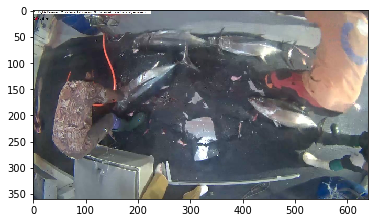

In [9]:
plot(trn[0])

In [10]:
# 最早我试图一次读入13154张图片，但是内存不够，完全读不了,目前test1只有1000张图片
test = get_data(path+'test', (360,640))

Found 1000 images belonging to 1 classes.


In [11]:
save_array(path+'results/trn_640.dat', trn)
save_array(path+'results/val_640.dat', val)

In [12]:
save_array(path+'results/test_640.dat', test)

In [5]:
trn = load_array(path+'results/trn_640.dat')
val = load_array(path+'results/val_640.dat')

We can now create our VGG model - we'll need to tell it we're not using the normal 224x224 images, which also means it won't include the fully connected layers (since they don't make sense for non-default sizes). We will also remove the last max pooling layer, since we don't want to throw away information yet.

In [13]:
vgg640 = Vgg16BN((360, 640)).model
vgg640.pop()
vgg640.input_shape, vgg640.output_shape
vgg640.compile(Adam(), 'categorical_crossentropy', metrics=['accuracy'])

We can now pre-compute the output of the convolutional part of VGG.

In [14]:
conv_val_feat = vgg640.predict(val, batch_size=32, verbose=1)
conv_trn_feat = vgg640.predict(trn, batch_size=32, verbose=1)

3277/3277 [==============================] - 95s 29ms/step


In [ ]:
save_array(path+'results/conv_val_640.dat', conv_val_feat)
save_array(path+'results/conv_trn_640.dat', conv_trn_feat)

In [15]:
conv_test_feat = vgg640.predict(test, batch_size=32, verbose=1)

1000/1000 [==============================] - 31s 31ms/step


In [16]:
save_array(path+'results/conv_test_640.dat', conv_test_feat)

In [7]:
conv_val_feat = load_array(path+'results/conv_val_640.dat')
conv_trn_feat = load_array(path+'results/conv_trn_640.dat')

In [8]:
conv_test_feat = load_array(path+'results/conv_test_640.dat')

### 完整的全卷积网络 Fully convolutional net (FCN)

Since we're using a larger input, the output of the final convolutional layer is also larger. So we probably don't want to put a dense layer there - that would be a *lot* of parameters! Instead, let's use a fully convolutional net (FCN); this also has the benefit that they tend to generalize well, and also seems like a good fit for our problem (since the fish are a small part of the image).


由于我们使用的是更大的输入，最终卷积层的输出也更大。所以我们可能不想在那里放一个稠密的层——那将会有很多参数！相反，让我们使用一个完全卷积的网络（FCN）;这也有好处，他们倾向于很好地概括，而且似乎也很适合我们的问题（因为鱼是图像的一小部分）。

In [17]:
conv_layers,_ = split_at(vgg640, Conv2D) # 丢弃全连接层，因为参数太多了

I'm not using any dropout, since I found I got better results without it.

In [19]:
nf=128; p=0.6

In [20]:
def get_lrg_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Conv2D(nf,kernel_size=(3,3),strides=(1,1), activation='relu', padding='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,kernel_size=(3,3),strides=(1,1), activation='relu',  padding='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Conv2D(nf,kernel_size=(3,3),strides=(1,1), activation='relu',  padding='same'),
        BatchNormalization(axis=1),
        MaxPooling2D((1,2)),
        Conv2D(8,kernel_size=(3,3),strides=(1,1),  padding='same'),
        Dropout(p),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ]

In [21]:
lrg_model = Sequential(get_lrg_layers())

In [22]:
lrg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 512, 22, 40)       2048      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 22, 40)       589952    
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 22, 40)       512       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 11, 20)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 11, 20)       147584    
_________________________________________________________________
batch_normalization_3 (Batch (None, 128, 11, 20)       512       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 128, 5, 10)        0         
__________

In [23]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, epochs=2, 
             validation_data=(conv_val_feat, val_labels))

Train on 3277 samples, validate on 500 samples
Epoch 1/2
3277/3277 [==============================] - 16s 5ms/step - loss: 0.8422 - acc: 0.7159 - val_loss: 0.3665 - val_acc: 0.8740
Epoch 2/2
3277/3277 [==============================] - 7s 2ms/step - loss: 0.2111 - acc: 0.9408 - val_loss: 0.1812 - val_acc: 0.9440


In [25]:
lrg_model.optimizer.lr=1e-5

In [26]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, epochs=20, 
             validation_data=(conv_val_feat, val_labels))

Train on 3277 samples, validate on 500 samples
Epoch 1/20
3277/3277 [==============================] - 6s 2ms/step - loss: 0.1085 - acc: 0.9722 - val_loss: 0.1825 - val_acc: 0.9540
Epoch 2/20
3277/3277 [==============================] - 6s 2ms/step - loss: 0.0676 - acc: 0.9850 - val_loss: 0.1704 - val_acc: 0.9480
Epoch 3/20
3277/3277 [==============================] - 6s 2ms/step - loss: 0.0335 - acc: 0.9918 - val_loss: 0.1316 - val_acc: 0.9540
Epoch 4/20
3277/3277 [==============================] - 6s 2ms/step - loss: 0.0368 - acc: 0.9921 - val_loss: 0.1688 - val_acc: 0.9440
Epoch 5/20
3277/3277 [==============================] - 6s 2ms/step - loss: 0.0160 - acc: 0.9973 - val_loss: 0.1403 - val_acc: 0.9620
Epoch 6/20
3277/3277 [==============================] - 6s 2ms/step - loss: 0.0065 - acc: 0.9991 - val_loss: 0.1259 - val_acc: 0.9700
Epoch 7/20
3277/3277 [==============================] - 6s 2ms/step - loss: 0.0161 - acc: 0.9957 - val_loss: 0.1291 - val_acc: 0.9600
Epoch 8/20
3277

When I submitted the results of this model to Kaggle, I got the best single model results of any shown here (ranked 22nd on the leaderboard as at Dec-6-2016.)

In [27]:
lrg_model.save_weights(path+'models/lrg_nmp.h5')

In [28]:
lrg_model.load_weights(path+'models/lrg_nmp.h5')

In [29]:
lrg_model.evaluate(conv_val_feat, val_labels)

500/500 [==============================] - 1s 2ms/step


[0.1314130316474475, 0.9619999995231628]

In [31]:
lrg_model.predict(conv_test_feat,verbose=1)

1000/1000 [==============================] - 2s 2ms/step


array([[1.1040e-07, 2.3821e-10, 7.8827e-10, ..., 1.1697e-09, 5.0658e-10, 1.0595e-09],
       [5.8700e-01, 1.0214e-01, 1.5212e-02, ..., 8.4234e-03, 1.2287e-04, 2.1007e-01],
       [9.9995e-01, 4.1849e-05, 1.3450e-06, ..., 5.9745e-06, 1.2888e-09, 2.1822e-10],
       ...,
       [1.0000e+00, 8.8315e-09, 4.4395e-08, ..., 1.3402e-07, 3.2193e-10, 1.2744e-06],
       [9.9996e-01, 3.9321e-05, 2.7365e-09, ..., 1.6500e-08, 6.5550e-13, 3.9775e-09],
       [3.5366e-04, 9.6913e-03, 6.5995e-05, ..., 9.8902e-01, 2.4482e-05, 1.6290e-05]],
      dtype=float32)

### 提交

In [3]:
# 补充test2的数据 ，还是memory的问题，根本没办法，目前24G内存也读不进来┏┛墓┗┓...(((m -__-)m了
test = get_data(path+'test2', (360,640))

Found 12153 images belonging to 1 classes.


MemoryError: 

Another benefit of this kind of model is that the last convolutional layer has to learn to classify each part of the image (since there's only an average pooling layer after). Let's create a function that grabs the output of this layer (which is the 4th-last layer of our model).

In [ ]:
l = lrg_model.layers
conv_fn = K.function([l[0].input, K.learning_phase()], l[-4].output)

In [ ]:
def get_cm(inp, label):
    conv = conv_fn([inp,0])[0, label]
    return scipy.misc.imresize(conv, (360,640), interp='nearest')

We have to add an extra dimension to our input since the CNN expects a 'batch' (even if it's just a batch of one).

In [ ]:
inp = np.expand_dims(conv_val_feat[0], 0)
np.round(lrg_model.predict(inp)[0],2)

In [ ]:
plt.imshow(to_plot(val[0]))

In [ ]:
cm = get_cm(inp, 0)

The heatmap shows that (at very low resolution) the model is finding the fish!

In [ ]:
plt.imshow(cm, cmap="cool")

### All convolutional net heatmap

To create a higher resolution heatmap, we'll remove all the max pooling layers, and repeat the previous steps.

In [ ]:
def get_lrg_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        Convolution2D(8,3,3, border_mode='same'),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ]

In [ ]:
lrg_model = Sequential(get_lrg_layers())

In [ ]:
lrg_model.summary()

In [ ]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=2, 
             validation_data=(conv_val_feat, val_labels))

In [ ]:
lrg_model.optimizer.lr=1e-5

In [ ]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=6, 
             validation_data=(conv_val_feat, val_labels))

In [ ]:
lrg_model.save_weights(path+'models/lrg_0mp.h5')

In [ ]:
lrg_model.load_weights(path+'models/lrg_0mp.h5')

#### Create heatmap

In [ ]:
l = lrg_model.layers
conv_fn = K.function([l[0].input, K.learning_phase()], l[-3].output)

In [ ]:
def get_cm2(inp, label):
    conv = conv_fn([inp,0])[0, label]
    return scipy.misc.imresize(conv, (360,640))

In [ ]:
inp = np.expand_dims(conv_val_feat[0], 0)

In [ ]:
plt.imshow(to_plot(val[0]))

In [ ]:
cm = get_cm2(inp, 0)

In [ ]:
cm = get_cm2(inp, 4)

In [ ]:
plt.imshow(cm, cmap="cool")

In [ ]:
plt.figure(figsize=(10,10))
plot(val[0])
plt.imshow(cm, cmap="cool", alpha=0.5)

### Inception mini-net

Here's an example of how to create and use "inception blocks" - as you see, they use multiple different convolution filter sizes and concatenate the results together. We'll talk more about these next year.

In [ ]:
def conv2d_bn(x, nb_filter, nb_row, nb_col, subsample=(1, 1)):
    x = Convolution2D(nb_filter, nb_row, nb_col,
                      subsample=subsample, activation='relu', border_mode='same')(x)
    return BatchNormalization(axis=1)(x)

In [ ]:
def incep_block(x):
    branch1x1 = conv2d_bn(x, 32, 1, 1, subsample=(2, 2))
    branch5x5 = conv2d_bn(x, 24, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 32, 5, 5, subsample=(2, 2))

    branch3x3dbl = conv2d_bn(x, 32, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 48, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 48, 3, 3, subsample=(2, 2))

    branch_pool = AveragePooling2D(
        (3, 3), strides=(2, 2), border_mode='same')(x)
    branch_pool = conv2d_bn(branch_pool, 16, 1, 1)
    return merge([branch1x1, branch5x5, branch3x3dbl, branch_pool],
              mode='concat', concat_axis=1)

In [ ]:
inp = Input(vgg640.layers[-1].output_shape[1:]) 
x = BatchNormalization(axis=1)(inp)
x = incep_block(x)
x = incep_block(x)
x = incep_block(x)
x = Dropout(0.75)(x)
x = Convolution2D(8,3,3, border_mode='same')(x)
x = GlobalAveragePooling2D()(x)
outp = Activation('softmax')(x)

In [ ]:
lrg_model = Model([inp], outp)

In [ ]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=2, 
             validation_data=(conv_val_feat, val_labels))

In [ ]:
lrg_model.optimizer.lr=1e-5

In [ ]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=6, 
             validation_data=(conv_val_feat, val_labels))

In [ ]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=10, 
             validation_data=(conv_val_feat, val_labels))

In [ ]:
lrg_model.save_weights(path+'models/lrg_nmp.h5')

In [ ]:
lrg_model.load_weights(path+'models/lrg_nmp.h5')

## Pseudo-labeling

In [ ]:
model = vgg_ft_bn(8)

In [ ]:
model.load_weights(path+'results/ft1.h5')

In [ ]:
conv_layers,fc_layers = split_at(model, Conv2D)

In [ ]:
conv_feat = load_array(path+'results/conv_feat.dat')
conv_val_feat = load_array(path+'results/conv_val_feat.dat')
conv_test_feat = load_array(path+'results/conv_test_feat.dat')

In [ ]:
p=0.6

In [ ]:
len(id2size)

In [ ]:
conv_layers[-1].output_shape[1:]

In [ ]:
inp = Input(conv_layers[-1].output_shape[1:])
sz_inp = Input((len(id2size),))
bn_inp = BatchNormalization()(sz_inp)

x = MaxPooling2D()(inp)
x = BatchNormalization(axis=1)(x)
x = Dropout(p/4)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p/2)(x)
x = keras.layers.concatenate([x,bn_inp])
x = Dense(8, activation='softmax')(x)

In [ ]:
conv_feat.shape

In [ ]:
model = Model([inp, sz_inp], x)
model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit([conv_feat, trn_sizes], trn_labels, batch_size=batch_size, epochs=30, 
             validation_data=([conv_val_feat, val_sizes], val_labels))

In [ ]:
model.optimizer.lr = 0.0001

In [ ]:
model.fit([conv_feat, trn_sizes], trn_labels, batch_size=batch_size, epochs=30, 
             validation_data=([conv_val_feat, val_sizes], val_labels))

In [ ]:
preds = model.predict([conv_test_feat, test_sizes], batch_size=batch_size*2) # 半监督学些，伪标记

In [ ]:
preds[:1] # 8种图片大小

In [ ]:
gen = image.ImageDataGenerator()

In [ ]:
conv_test_feat.shape

In [ ]:
test_batches = gen.flow(conv_test_feat, preds, batch_size=16)

In [ ]:
val_batches = gen.flow(conv_val_feat, val_labels, batch_size=4)

In [ ]:
batches = gen.flow(conv_feat, trn_labels, batch_size=44)

In [ ]:
next(batches)[0][0].shape

In [ ]:
next(batches)[0][1].shape

In [ ]:
type(batches)

In [ ]:
class MixIterator(object):
    def __init__(self, iters):
        self.iters = iters
        self.multi = type(iters) is list
        if self.multi:
            self.n = sum([it.n for it in self.iters])
        else:
            self.n = sum([it.n for it in self.iters])

    def reset(self):
        for it in self.iters: 
            it.reset()

    def __iter__(self):
        return self

    def next(self, *args, **kwargs):
        if self.multi:
#             for o in self.iters:
#                 for it in o:
#                     print(type(it))
            nexts = [[next(o)] for o in self.iters]
            n0 = np.concatenate([n[0][0] for n in nexts])
            n1 = np.concatenate([n[1][1] for n in nexts])
            return (n0, n1)
        else:
            nexts = [next(it) for it in self.iters]
            n0 = np.concatenate([n[0][0] for n in nexts])
            n1 = np.concatenate([n[1][0] for n in nexts])
            return (n0, n1)

In [ ]:
mi = MixIterator([batches, test_batches, val_batches])

In [ ]:
bn_model.fit_generator(mi, mi.n, epochs=8, validation_data=(conv_val_feat, val_labels))

## Submit 1

In [19]:
def do_clip(arr, mx): 
    return np.clip(arr, (1-mx)/7, mx)

In [21]:
lrg_model.evaluate(conv_val_feat, val_labels, batch_size*2)

500/500 [==============================] - 1s 2ms/step


[0.09338698065280915, 0.9759999933242798]

In [74]:
preds = lrg_model.predict(conv_test_feat, batch_size=batch_size)

ValueError: Error when checking : expected batch_normalization_1_input to have shape (512, 22, 40) but got array with shape (512, 14, 14)

In [53]:
preds

array([[7.0146e-08, 2.6696e-11, 7.4684e-10, ..., 3.6034e-09, 1.3104e-10, 8.2221e-10],
       [4.2325e-02, 6.0928e-02, 7.1933e-02, ..., 2.3123e-02, 1.5421e-03, 7.8815e-01],
       [9.9999e-01, 1.0406e-05, 1.3786e-09, ..., 3.8028e-07, 7.6829e-08, 2.2774e-08],
       ...,
       [1.0000e+00, 2.3077e-07, 1.2805e-07, ..., 1.4307e-07, 1.1417e-08, 3.3664e-06],
       [9.9997e-01, 3.0715e-05, 4.3049e-10, ..., 7.7421e-10, 6.8522e-10, 4.3267e-09],
       [1.6041e-01, 3.9045e-02, 2.8258e-03, ..., 7.2550e-01, 2.4299e-03, 2.5964e-03]],
      dtype=float32)

In [70]:
preds.shape

(1000, 8)

In [54]:
preds = preds[1]

In [26]:
preds

array([0.0423, 0.0609, 0.0719, 0.0091, 0.0029, 0.0231, 0.0015, 0.7881], dtype=float32)

In [60]:
subm = do_clip(preds,0.82)

In [61]:
subm.shape

(1000, 8)

In [62]:
subm_name = path+'results/subm_bb.gz'

In [63]:
# classes = sorted(batches.class_indices, key=batches.class_indices.get)
classes = ['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']

In [67]:
submission = pd.DataFrame(data = subm, columns=classes)
submission.insert(0, 'image', [a[8:] for a in raw_test_filenames])
submission.head()

,image,ALB,BET,DOL,LAG,NoF,OTHER,SHARK,YFT
0,img_00005.jpg,0.025714,0.025714,0.025714,0.025714,0.820000,0.025714,0.025714,0.025714
1,img_00007.jpg,0.042325,0.060928,0.071933,0.025714,0.025714,0.025714,0.025714,0.788148
2,img_00009.jpg,0.820000,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714
3,img_00018.jpg,0.820000,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714
4,img_00027.jpg,0.025714,0.105304,0.025714,0.025714,0.025714,0.221826,0.077913,0.581096


In [68]:
submission.to_csv(subm_name, index=False, compression='gzip')

In [69]:
FileLink(subm_name)

D:\ML\courses\deeplearning1\nbs\data\fish\results\subm_bb.gz